In [16]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint
from feature_engineering import numericalise

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
df = pd.read_csv("data/Train.csv", 
                 low_memory=False, 
                 parse_dates=["saledate"])
df.head(2).T

,0,1
SalesID,1139246,1139248
SalePrice,66000,57000
MachineID,999089,117657
ModelID,3157,77
datasource,121,121
auctioneerID,3,3
YearMade,2004,1996
MachineHoursCurrentMeter,68,4640
UsageBand,Low,Low
saledate,2006-11-16 00:00:00,2004-03-26 00:00:00


In [16]:
df.shape

(401125, 53)

In [4]:
def display_all(df):
    with pd.option_context("display.max_rows", 1000, "display.max_columns", 1000): 
        display(df)

## Null value percentages

In [17]:
df.isnull().sum().sort_values(ascending=False) / len(df)

Tip_Control                 0.937129
Blade_Extension             0.937129
Blade_Width                 0.937129
Enclosure_Type              0.937129
Engine_Horsepower           0.937129
Pushblock                   0.937129
Scarifier                   0.937102
Hydraulics_Flow             0.891899
Grouser_Tracks              0.891899
Coupler_System              0.891660
fiModelSeries               0.858129
Steering_Controls           0.827064
Differential_Type           0.826959
UsageBand                   0.826391
fiModelDescriptor           0.820707
Backhoe_Mounting            0.803872
Pad_Type                    0.802720
Stick                       0.802720
Turbocharged                0.802720
Blade_Type                  0.800977
Travel_Controls             0.800975
Tire_Size                   0.763869
Track_Type                  0.752813
Grouser_Type                0.752813
Pattern_Changer             0.752651
Stick_Length                0.752651
Thumb                       0.752476
U

## While many columns have null values, there are not missing at random, and their missingness itself is possibly a features

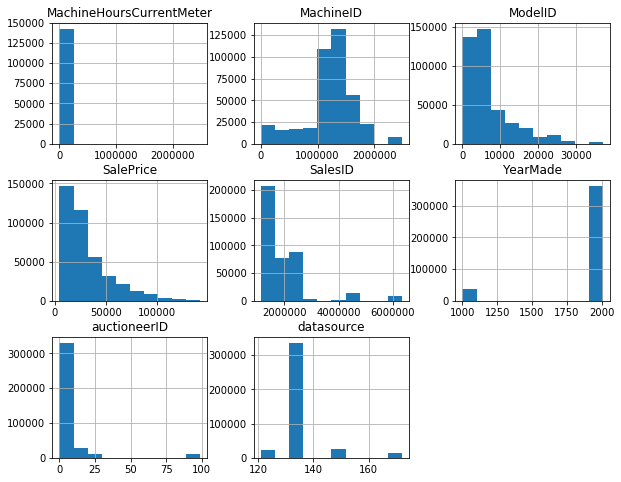

In [9]:
df.select_dtypes(exclude='O').hist(figsize=(10,8));

In [11]:
# basic stats

df.select_dtypes(exclude='O').describe().T

,count,mean,std,min,25%,50%,75%,max
SalesID,401125.0,1.919713e+06,909021.492667,1139246.0,1418371.0,1639422.0,2242707.0,6333342.0
SalePrice,401125.0,3.109971e+04,23036.898502,4750.0,14500.0,24000.0,40000.0,142000.0
MachineID,401125.0,1.217903e+06,440991.954249,0.0,1088697.0,1279490.0,1468067.0,2486330.0
ModelID,401125.0,6.889703e+03,6221.777842,28.0,3259.0,4604.0,8724.0,37198.0
datasource,401125.0,1.346658e+02,8.962237,121.0,132.0,132.0,136.0,172.0
auctioneerID,380989.0,6.556040e+00,16.976779,0.0,1.0,2.0,4.0,99.0
YearMade,401125.0,1.899157e+03,291.797469,1000.0,1985.0,1995.0,2000.0,2013.0
MachineHoursCurrentMeter,142765.0,3.457955e+03,27590.256413,0.0,0.0,0.0,3025.0,2483300.0


In [13]:
# correlation

df.select_dtypes(exclude='O').corr()['SalePrice'].sort_values()

# Machine ID strangely shows some correction. That is probably because
# machine ID is correlated with year made

MachineID                  -0.224854
auctioneerID               -0.046865
ModelID                    -0.042125
SalesID                     0.010725
MachineHoursCurrentMeter    0.013560
datasource                  0.015122
YearMade                    0.156453
SalePrice                   1.000000
Name: SalePrice, dtype: float64

## Converting categorical cols to numbers.
#### This is purely for understanding the data a little

In [21]:
#this function successfully converts all categoricals to numbers
df_numericalised = numericalise(df)

df_numericalised.dtypes

SalesID                              int64
SalePrice                            int64
MachineID                            int64
ModelID                              int64
datasource                           int64
auctioneerID                       float64
YearMade                             int64
MachineHoursCurrentMeter           float64
UsageBand                             int8
saledate                    datetime64[ns]
fiModelDesc                          int16
fiBaseModel                          int16
fiSecondaryDesc                      int16
fiModelSeries                         int8
fiModelDescriptor                    int16
ProductSize                           int8
fiProductClassDesc                    int8
state                                 int8
ProductGroup                          int8
ProductGroupDesc                      int8
Drive_System                          int8
Enclosure                             int8
Forks                                 int8
Pad_Type   

In [22]:
# to recheck the correlation between all the variables wrt target

df_numericalised.corr()['SalePrice'].sort_values(ascending=False)

SalePrice                   1.000000
fiModelDescriptor           0.296184
ProductSize                 0.238562
ProductGroup                0.235409
ProductGroupDesc            0.235409
Ripper                      0.232028
Pushblock                   0.213933
Engine_Horsepower           0.202529
fiSecondaryDesc             0.189531
Blade_Extension             0.185804
Tip_Control                 0.181379
Scarifier                   0.179502
Tire_Size                   0.170819
Enclosure_Type              0.159872
Blade_Width                 0.159864
fiModelSeries               0.156846
YearMade                    0.156453
Track_Type                  0.151290
fiProductClassDesc          0.135842
Blade_Type                  0.135287
Pattern_Changer             0.132156
Grouser_Type                0.130667
Steering_Controls           0.118485
Differential_Type           0.116031
Undercarriage_Pad_Width     0.115180
Backhoe_Mounting            0.112625
Thumb                       0.107233
T